# Bandits Gym Environment

In [24]:
import gym
import gym_bandits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import trange


In [51]:
import random
random.seed(30)

BanditTenArmedGaussian-v0: 10 armed bandit mentioned on page 30 of Reinforcement Learning: An Introduction (Sutton and Barto)

In [72]:
env = gym.make("BanditTenArmedGaussian-v0") # Replace with relevant env
env.reset()

Discrete(10)


In [ ]:
print(env.action_space)

Let us check what the output of a single step is. 
Choose action 1.

In [53]:
env.step(1)

(0, -1.326240432096737, True, {})

Now let us choose a different action (bandit arm), action 2:

In [54]:
env.step(2)

(0, -1.1541855200833855, True, {})

In [55]:
runs = 1000
actions = 10
rewards = np.zeros((actions, runs))

for act in range(actions):
    for r in range(runs):
        observation, rewards[act, r], done, info = env.step(act)
   
    

(10, 1000)

Text(0, 0.5, 'Reward distribution')

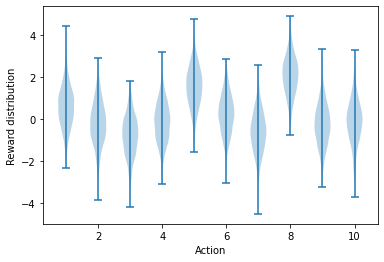

In [65]:
plt.violinplot(dataset=rewards.T)
plt.xlabel("Action")
plt.ylabel("Reward distribution")


(array([ 12.,  41., 113., 197., 253., 216., 114.,  37.,  14.,   3.]),
 array([-3.23445   , -2.57929976, -1.92414951, -1.26899926, -0.61384902,
         0.04130123,  0.69645147,  1.35160172,  2.00675197,  2.66190221,
         3.31705246]),
 <BarContainer object of 10 artists>)

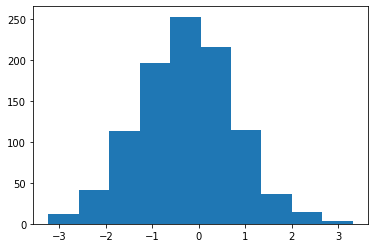

In [70]:
plt.hist(rewards[8,])

# Implement a basic Reinforcement Learning algorithm

Now that we have our Ten-armed bandit enviroment, let's code up an Agent that uses an action-value method that chooses the action with the highest Q-value with probability 1- eps and chooses a random action with probability eps.

We want to create Figure 2.2 ourselves. We implement the pseudo code on page 32 of Sutton & Barto.

We need an array of size 10, `q_table` to hold for each action its current estimated Q-value.
Choose `step_size = 0.1`

https://colab.research.google.com/drive/1oqon14Iq8jzx6PhMJvja-mktFTru5GPl#scrollTo=RW6HkwClL8y6


In [73]:
def choose_action(epsilon = 0.1, indices, q_table):
    if np.random.rand() < epsilon:
        return np.random.choice(indices)
    q_best = np.max(q_table)
    # choose FROM ACTIONS WITH BEST Q-VAL at random
    return np.random.choice(np.where(q_table == q_best)[0])


SyntaxError: 'return' outside function (<ipython-input-73-1bb89783c8c0>, line 2)

In [ ]:
step_size = 0.1
time = 1000
eps = 0.1

# init q_table
q_table = np.zeros(len(actions))

for t in range(time):
    action = choose_action(epsilon = eps, indices = actions, q_table)
    # play action, collect reward
    reward =  env.step(action)
    # update q_table for the chosen action
    q_table[action] += step_size * (reward - q_table[action])
